# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
#Your code here
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
!git clone https://github.com/kingmk-3/LS_ML.git

Cloning into 'LS_ML'...
remote: Enumerating objects: 4320, done.
remote: Total 4320 (delta 0), reused 0 (delta 0), pack-reused 4320
Receiving objects: 100% (4320/4320), 387.49 MiB | 15.03 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Updating files: 100% (5333/5333), done.


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [4]:
data=tf.keras.utils.image_dataset_from_directory('/content/LS_ML/Week3/data',image_size=(256,256),batch_size=32,label_mode='int')#Your code here

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [5]:
data_iterator=data.as_numpy_iterator()

In [6]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

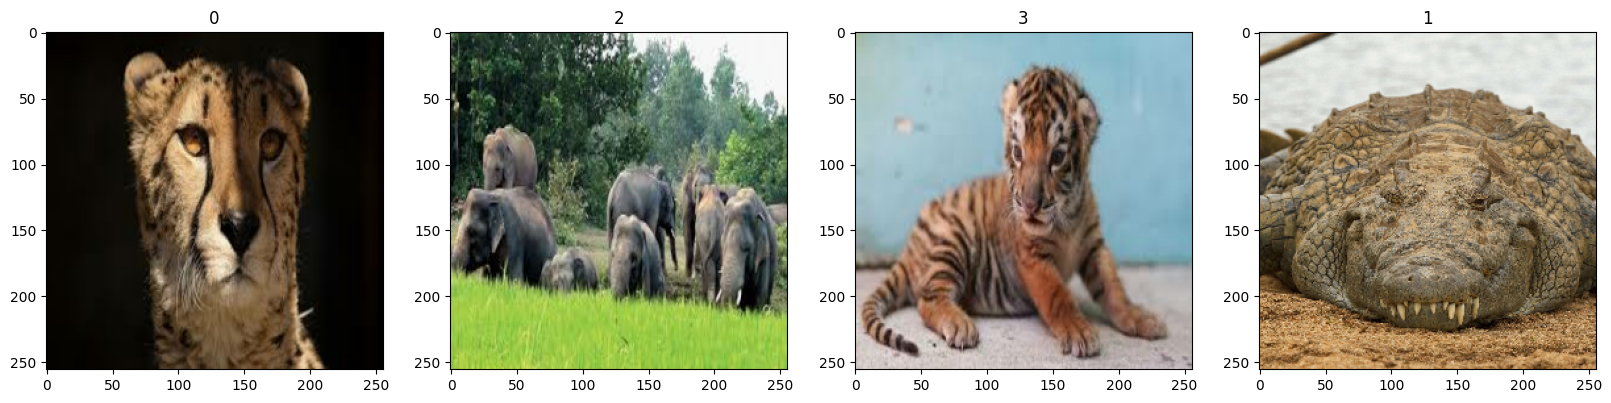

In [7]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [8]:
data=data.map((lambda x, y: (x / 255.0, y)))#Your code here)

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [9]:
#Your code here
train_size = int(len(data) * .8)
train = data.take(train_size)
test = data.skip(train_size)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [10]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])
#Your code here

**Q.6** Compile your model

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])#Your code here)

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [12]:
history = model.fit(
  train,
  epochs=10
)#Your code here)

Epoch 1/10
41/41 [==============================] - 18s 191ms/step - loss: 1.8057 - accuracy: 0.2919
Epoch 2/10
41/41 [==============================] - 9s 196ms/step - loss: 1.3409 - accuracy: 0.3712
Epoch 3/10
41/41 [==============================] - 9s 184ms/step - loss: 1.2876 - accuracy: 0.4398
Epoch 4/10
41/41 [==============================] - 8s 174ms/step - loss: 1.0333 - accuracy: 0.5983
Epoch 5/10
41/41 [==============================] - 9s 169ms/step - loss: 0.9094 - accuracy: 0.6517
Epoch 6/10
41/41 [==============================] - 10s 197ms/step - loss: 0.8000 - accuracy: 0.7050
Epoch 7/10
41/41 [==============================] - 9s 194ms/step - loss: 0.5314 - accuracy: 0.8186
Epoch 8/10
41/41 [==============================] - 9s 186ms/step - loss: 0.3920 - accuracy: 0.8765
Epoch 9/10
41/41 [==============================] - 8s 168ms/step - loss: 0.2422 - accuracy: 0.9169
Epoch 10/10
41/41 [==============================] - 8s 167ms/step - loss: 0.1829 - accuracy: 0.94

**Q.8** Test your code with test set

In [13]:
loss,accuracy=model.evaluate(test)#Your code here)

11/11 [==============================] - 9s 154ms/step - loss: 0.5556 - accuracy: 0.8613


In [14]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8612716794013977


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**